<!---
Latex Macros
-->
$$
\newcommand{\bar}{\,|\,}
\newcommand{\Xs}{\mathcal{X}}
\newcommand{\Ys}{\mathcal{Y}}
\newcommand{\y}{\mathbf{y}}
\newcommand{\weights}{\mathbf{w}}
\newcommand{\balpha}{\boldsymbol{\alpha}}
\newcommand{\bbeta}{\boldsymbol{\beta}}
\newcommand{\aligns}{\mathbf{a}}
\newcommand{\align}{a}
\newcommand{\source}{\mathbf{s}}
\newcommand{\target}{\mathbf{t}}
\newcommand{\ssource}{s}
\newcommand{\starget}{t}
\newcommand{\repr}{\mathbf{f}}
\newcommand{\repry}{\mathbf{g}}
\newcommand{\x}{\mathbf{x}}
\newcommand{\prob}{p}
\newcommand{\vocab}{V}
\newcommand{\params}{\boldsymbol{\theta}}
\newcommand{\param}{\theta}
\DeclareMathOperator{\perplexity}{PP}
\DeclareMathOperator{\argmax}{argmax}
\DeclareMathOperator{\argmin}{argmin}
\newcommand{\train}{\mathcal{D}}
\newcommand{\counts}[2]{\#_{#1}(#2) }
\newcommand{\length}[1]{\text{length}(#1) }
\newcommand{\indi}{\mathbb{I}}
$$

# Assignment 2

## Introduction
In this assignment you will build the first stage of a biomedical event extractor. Biomedical events are state changes of biomolecules. For example, if you have a protein and you add a phosphate (PO4) group to it, this is referred to as a phosphorylation event. Many papers in the biomedical literature mention such events. The grand goal of biomedical event extraction is to teach machines how to read this literature and produce structured representations of biomedical events that biomedical researchers can query effectively. This task has received considerable attention in the NLP literature, and is the topic of a biennial [shared task](http://2011.bionlp-st.org/). We will use the data from this task as starting point for this assignment.   

To illustrate biomedical event extraction, let us consider an example. From the sentence 

> **phosphorylation** of TRAF2 **inhibits** **binding** to the CD40 domain

we could extract the structure 

> Negative_Regulation(Phosphorylation(TRAF2), Binding(TRAF2, CD40)

and store it in a database. Someone can then query this database, for example, to figure out all ways to prevent binding of TRAF2 to CD40.

The task is often divided into two steps. First you need to find **trigger** words in the sentence that correspond to biomedical events, and determine their event type *label*. For example, in the above sentence "phosphorylation" is a trigger word for an event of type "Phosphorylation", "inhibits" a trigger word for a "Negative Regulation" event, and "binding" a trigger for a "Binding" event. Notice that sometimes the type labels are obvious, but often they are not. Also note that the label of a word could be "None". For example, the word "of" in the above sentence has the label "None".  

The second step requires the extractor to produce **argument relations** between event triggers and protein mentions or other event triggers. For example, in the above case the argument of "phosphorylation" is "TRAF2", and one argument of "inhibits" is "phosphorylation of TRAF2" whereas the other is "binding to the CD40 domain". In this assignment you **do not have to do this**. We will focus on the event trigger detection problem exclusively. 

## Goal
Your goal is to develop an event trigger labeler. This extractor is given a sentence and a candidate token. Both constitute the input $\x$. One such input could be: 

> $\x$: phosphorylation of TRAF2 **inhibits** binding to the CD40 domain

The goal is to predict the label $y$ of the candidate event trigger. In the above case the label would be $y=\text{Negative_Regulation}$. 

Some candidates may not refer to event triggers at all. For example:

> $\x$: phosphorylation **of** TRAF2 inhibits binding to the CD40 domain

In such cases the label is $y=\text{None}$.

## Resources
To develop your model you have access to:

* The data in `data/bionlp/train`. This data can be split into training and dev set (as done below), or used for cross-validation.
* Helper code stored in the python module [bio.py](/edit/statnlpbook/bio.py).
* Libraries on the [docker image](https://github.com/uclmr/stat-nlp-book/blob/python/Dockerfile) which contains everything in [this image](https://github.com/jupyter/docker-stacks/tree/master/scipy-notebook), including scikit-learn and tensorflow. 

As we have to run the notebooks of all students, and because writing efficient code is important, **your notebook should run in 5 minutes at most**, on your machine. Further comments:

* We have tested a possible solution on the Azure VMs and it ran in about 30s, so it is possible to train a reasonable model on the data in reasonable time. If you find training times too long for your development cycle you can reduce the training set size. Once you have found a good solution you can increase the size again. Caveat: model parameters tuned on a smaller dataset may not be optimal for a larger training set.

* Try to run your parameter optimisation offline, such that in your answer notebook the best parameters are already set and don't need to be searched. Include your optimisation code in the notebook, but don't call it at each notebook run.

## Hint
While you do not need to predict the arguments of an event, it is important to understand how trigger labels relate to the syntactic and semantic arguments of the trigger word. Features that can capture this relation might help you in improving the result. Do inspect the data and try to get an understanding of it. That said, you don't have to be a biomedical expert to do well in this task. A few of the best results on the task were achieved by NLP researchers without any biomedical experience. They would, however, still inspect the data carefully.  

## Setup Instructions
It is important that this file is placed in the **correct directory**. It will not run otherwise. The correct directory is

    DIRECTORY_OF_YOUR_BOOK/assignments/2016/assignment2/problem/
    
where `DIRECTORY_OF_YOUR_BOOK` is a placeholder for the directory you downloaded the book to. After you placed it there, **rename the file** to your UCL ID (of the form `ucxxxxx`). 

## General Instructions
This notebook will be used by you to provide your solution, and by us to both assess your solution and enter your marks. It contains three types of sections:

1. **Setup** Sections: these sections set up code and resources for assessment. **Do not edit, move nor copy these cells**.
2. **Assessment** Sections: these sections are used for both evaluating the output of your code, and for markers to enter their marks. **Do not edit, move, nor copy these cells**.
3. **Task** Sections: these sections require your solutions. They may contain stub code, and you are expected to edit this code. For free text answers simply edit the markdown field.  

**If you edit, move or copy any of the setup, assessments and mark cells, you will be penalised with -10 points**.

Note that you are free to **create additional notebook cells** within a task section. 

Please **do not share** this assignment publicly, by uploading it online, emailing it to friends etc. 

## Submission Instructions

To submit your solution:

* Make sure that your solution is fully contained in this notebook. 
* Make sure that your solution runs linearly from start to end (no execution hops). We will run your notebook in that order.
* **If running your notebook produces a trivially fixable error that we spot, we will correct it and penalise you with -10 points. Otherwise you will get 0 points for that solution.**
* **Rename this notebook to your UCL ID** (of the form "ucxxxxx"), if you have not already done so. ** Failure to do so will result in -1 point.**
* Download the notebook in Jupyter via *File -> Download as -> Notebook (.ipynb)*.
* Upload the notebook to the Moodle submission site.

## <font color='green'>Setup 1</font>: Load Libraries
This cell loads libraries important for evaluation and assessment of your model. **Do not change, move or copy it.**

In [25]:
%%capture
%load_ext autoreload
%autoreload 2
%matplotlib inline
#! SETUP 1 - DO NOT CHANGE, MOVE NOR COPY
import sys, os
_snlp_book_dir = "../../../../"
sys.path.append(_snlp_book_dir) 
import math
from collections import defaultdict
import statnlpbook.bio as bio

## <font color='green'>Setup 2</font>: Load Training Data

This cell loads the training data. **Do not edit this setup section, nor copy it**. Instead refer to the variables in your own code, and slice and dice them as you see fit (but do not change their values). For example, no one will stop you from introducing, in the corresponding task section, `my_event_train` and `my_event_dev` variables that split the data into different folds.   

Notice that the data is loaded from `json` files like [this one](/edit/data/bionlp/train/PMC-1310901-00-TIAB.json). Generally, you do not need to understand this format, as we provide loading functions that produce more convenient data structures shown below. But do feel free to investigate. 

In [26]:
#! SETUP 2 - DO NOT CHANGE, MOVE NOR COPY
train_path = _snlp_book_dir + "data/bionlp/train"
event_corpus = bio.load_assignment2_training_data(train_path)
event_train = event_corpus[:len(event_corpus)//4 * 3]
event_dev = event_corpus[len(event_corpus)//4 * 3:]
assert(len(event_train)==53988)

## Data Structures
The data comes in the form of pairs consisting of `EventCandidate` objects and their trigger labels. The `EventCandidate` class can be found in [bio.py](/edit/statnlpbook/bio.py).

In [27]:
event_candidate, label = event_corpus[0]
(event_candidate, label)

(<statnlpbook.bio.EventCandidate at 0x7f5143c0e5c0>, 'Negative_regulation')

Event candidate objects specify the classification problem. They consist of a sentence `sent` and the position `trigger_index` of the trigger candidate word. 

In [28]:
event_candidate.sent

In [29]:
event_candidate.trigger_index

0

Event candidates also have a set of candidate arguments. These point to token spans (index of first token, inclusive, index of last token, exclusive) in the sentence that may or may not be *arguments* of the event. In the full event extraction task one needs to predict which of these candidates are true arguments of the events. However, here we will ignore this task, and give you only the information what candidates exist, not what their labels are. Note that this information can still be **very important** to understand what type of event the candidate corresponds to, if any. 

In [30]:
event_candidate.argument_candidate_spans[:4]

[(2, 6), (23, 24), (24, 25), (59, 63)]

You can compactly visualise the complete candidate using `bio.render_event`, as shown below. Here the green span corresponds to the token at the trigger index. The spans in red brackets correspond to the argument candidates. The blue spans are protein mentions. 

In [31]:
bio.render_event(event_candidate)

### Sentences
The sentence object of an event candidate provides additional information about the sentence, such as what spans are proteins, what Part-of-Speech labels the tokens have, and a dependency parse of the sentence. First, the `tokens` field of a sentence provides useful features of tokens: 

In [32]:
event_candidate.sent.tokens[0]

{'begin': 0,
 'end': 15,
 'index': 0,
 'pos': 'NN',
 'stem': 'Down-regul',
 'word': 'Down-regulation'}

The `dependencies` field stores lexical dependencies between words:

In [33]:
event_candidate.sent.dependencies[:2]

[{'head': 44, 'label': 'nsubj', 'mod': 0},
 {'head': 4, 'label': 'nn', 'mod': 2}]

You can render the dependency graph of a sentence like so:

In [34]:
bio.render_dependencies(event_candidate.sent)

You can learn about the dependency labels in the [Stanford typed dependencies manual](http://nlp.stanford.edu/software/dependencies_manual.pdf). We also provide [lecture notes on dependency parsing](/notebooks/chapters/Transition-based%20dependency%20parsing.ipynb), including various pointers to more information. 

The `mentions` stores which spans correspond to proteins.

In [35]:
event_candidate.sent.mentions

[{'begin': 2, 'end': 6, 'label': 'Protein'},
 {'begin': 23, 'end': 24, 'label': 'Protein'},
 {'begin': 24, 'end': 25, 'label': 'Protein'},
 {'begin': 59, 'end': 63, 'label': 'Protein'},
 {'begin': 64, 'end': 65, 'label': 'Protein'}]

There are some convenience functions for the sentence to check all the syntactic parents or children of a token, or whether a specific token is within a protein mention. These can be useful when designing features:

In [36]:
event_candidate.sent.parents[0], event_candidate.sent.children[0] 

([(44, 'nsubj')], [(7, 'prep_of'), (20, 'prep_in')])

In [37]:
event_candidate.sent.is_protein[3], event_candidate.sent.is_protein[7]

(True, False)

### Labels
It is useful to know the complete set of event labels:

In [38]:
{y for _,y in event_corpus}

{'Binding',
 'Gene_expression',
 'Localization',
 'Negative_regulation',
 'None',
 'Phosphorylation',
 'Positive_regulation',
 'Protein_catabolism',
 'Regulation',
 'Transcription'}

## <font color='blue'>Task 1</font>: Create a Feature Function

In this task you will extract a specific feature representation $\repr(\x)$ for an event candidate $\x$. In particular, we want to add as features the syntactic children (modifiers) of the trigger token, together with their syntactic dependency label. A modifier of a token $h$ is a token $m$ that modifies $h$'s meaning. For example, in the noun phrase "green light" the adjective "green" modifies the noun "light". We will refer to the modifier token as the "child", and the modified token as "parent". Correspondingly, in the dependency graph modifiers are the child nodes of the modified tokens.  

The feature function will have to be implemented as a python function that populates a python dictionary with key-value pairs where the key indicates both the word and syntactic label of the child. 

For example, consider the following event and dependency parse:

In [39]:
example = event_corpus[398][0]
bio.render_dependencies(example.sent)

Here the goal is to produce a dictionary that maps the strings "Child: det->The" and "Child: nn->PCR" to 1.0. 

To solve this task, implement the feature function below. The passed in `result` is a dictionary you need to populate with more entries, and the `event` argument indicates for which event you need to extract the features. We have already populated the function with some initial code that should get you started.  

In [40]:
def add_dependency_child_feats(result, event):
    """
    Append to the `result` dictionary features based on the syntactic dependencies of the event trigger word of
    `event`. The feature keys should have the form "Child: [label]->[word]" where "[label]" is the syntactic label
    of the syntatic child (e.g. "det" in the case above), and "[word]" is the word of the syntactic child (e.g. "The" 
    in the case above).
    Args:
        result: a defaultdict that returns `0.0` by default. 
        event: the event for which we want to populate the `result` dictionary with dependency features.
    Returns:
        Nothing, but populates the `result` dictionary. 
    """
    index = event.trigger_index
    if len(event.sent.children[index]) > 0: 
        for child,label in event.sent.children[index]:
            child_name = event.sent.tokens[child]['word']
            result["Child: " + label + "->" + child_name] += 1.0

## <font color='red'>Assessment 1</font>: Test Feature Function (20 pts)
Here we test whether your feature function populates the given dictionary correctly. If the result passes all three tests you get 10 pts. Of course, solutions that just manually populate the result with the specific key value pairs tested below will receive 0 pts as well.

In [41]:
#! ASSESSMENT 1 - DO NOT CHANGE, MOVE NOR COPY
result = defaultdict(float)
add_dependency_child_feats(result, example)

check_1 = len(result) == 2
check_2 = result['Child: det->The'] == 1.0
check_3 = result['Child: nn->PCR'] == 1.0
(check_1, check_2, check_3)

(True, True, True)

## <font color='orange'>Mark</font>:  Your solution to Task 1 is marked with ** __ points**. 
---

## <font color='blue'>Task 2</font>: Implement Model

You are to implement the `predict_event_labels` function below. This function gets as input a list of event candidate objects, and then returns a sequence of corresponding labels. You can implement this function in any way you like, again utilising any library on the docker image. We have populated the cell and function with a simple implementation that uses the scikit-learn logistic regression model. You can use this as a starting point and focus on implementing better feature functions. You can also start from scratch if you like. 


In [42]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import string
import sys
from collections import defaultdict


from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

sys.setrecursionlimit(10000)

# converts labels into integers, and vice versa, needed by scikit-learn.
label_encoder = LabelEncoder()

# encodes feature dictionaries as numpy vectors, needed by scikit-learn.
vectorizer = DictVectorizer()

# This list of English stop words is taken from the "Glasgow Information
# Retrieval Group". The original list can be found at
# http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words
ENGLISH_STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves"])

# I used the website http://www.thesaurus.com as an aid to find the following "negative" words
NEGATIVE_WORDS = (["inhibit","constrain","curb","discourag","forbid", "hinder", "imped",
                  "obstruct","outlaw","prohibit","restrain","stym","suppress","arrest",
                  "avert","repress","stop","withhold","bar","block","break","paus",
                  "reduc","curtail","cut","cut down","diminish","dwindl","lessen",
                  "lower","par","scale down","shorten","slash","trim","weaken","abat",
                  "decreas","contract","cutback","declin","shrink","fail","breakdown",
                  "collaps","defeat","deficiency","deteriorat","loss","misstep","lose",
                  "failur"])

# The boolean function is_candidate(event, token) checks whether a given token in an event is 
# part of a candidate argument
def is_candidate(event, token):
    for candidate in event.argument_candidate_spans[:]:
        start = candidate[0]
        end = candidate[1]
        if token >= start and token < end:
            return 1.0 
            break
    return 0

# The function add_dependency_child_feats2(result, event) assigns a variety of children dependency 
# features to a given observation
def add_dependency_child_feats2(result, event, trigger_word, index, trigger_pos):
    flag1 = True 
    flag2 = True
    if len(event.sent.children[index]) > 0: 
        for child,label in event.sent.children[index]:
            child_name = event.sent.tokens[child]['word']
            result["Child: " + label + "->" + child_name] += 1.0
            result["Child_dependency_type: " + label] += 1.0
            pos = event.sent.tokens[child]['pos']
            result["Child_pos: " + pos] += 1.0
            result["Child_pos_dependency: " + pos + " " + label] += 1.0
            if flag1 and event.sent.is_protein[child]:
                result["Has_child_protein: "] = event.sent.is_protein[child]
                flag1 = False
            result["Child_protein: " + child_name] += event.sent.is_protein[child]
            result["Child_candidate: " + child_name] += is_candidate(event, child)
            # Tried Feature: result["Trigger_Protein: " + trigger_word + child_name] += event.sent.is_protein[child]
            result["Trigger_Candidate: " + trigger_word + child_name] += is_candidate(event, child)
            if event.sent.is_protein[child] and is_candidate(event, child):
                result["Both_protein_and_candidate: "] = 1
            if event.sent.is_protein[child]:
                result["Child_protein_path: " + trigger_pos + label + pos] += 1.0
            if len(event.sent.children[child]) > 0:  
                for grand_child, grand_child_label in event.sent.children[child]:
                    if flag2 and event.sent.is_protein[grand_child]:
                        result["Has_grand_child_protein: "] = event.sent.is_protein[grand_child]
                        flag2 = False
                    grand_pos = event.sent.tokens[grand_child]['pos']
                    result["Grand_child_pos: " + grand_pos] += 1.0
                    result["Grand_child_dependency: " + grand_pos + " " + grand_child_label] += 1.0
                    grand_child_name = event.sent.tokens[grand_child]['word'] 
                    #Tried Features:
                    #result["Path: " + label + "->" + child_name + "->" + grand_child_label + "->" + grand_child_name]
                    #result["Dep_path: " + trigger_pos + "->" + label + "->" + pos + "->" + grand_child_label + "->" + grand_pos]
                    #result["Path: " + label + "->" + grand_child_label]
                    result["Grand_child_candidate: " + grand_child_name] += is_candidate(event, grand_child)
                    if event.sent.is_protein[grand_child]:
                        result["Grand_child_protein_path: " + trigger_pos + "->" + label + "->" + pos + "->" + grand_child_label + "->" + grand_pos] += 1.0
                        # Tried Feature
                        #result["Grand_child_protein_word_path: " + trigger_word + child_name + grand_child_name] += 1

# The function add_dependency_parents_feats2(result, event) assigns a variety of parents dependency 
# features to a given observation
def add_dependency_parents_feats2(result, event, trigger_word, index, trigger_pos):
    flag1 = True 
    flag2 = True
    if len(event.sent.parents[index]) > 0: 
        for parent,label in event.sent.parents[index]:
            parent_name = event.sent.tokens[parent]['word']
            result["Parent: " + label + "<-" + parent_name] += 1.0
            result["Parent_dependency_type: " + label] += 1.0
            pos = event.sent.tokens[parent]['pos']
            result["Parent_pos: " + pos] += 1.0
            result["Parent_pos_dependency: " + pos + " " + label] += 1.0
            if flag1 and event.sent.is_protein[parent]:
                result["Has_parent_protein: "] = event.sent.is_protein[parent]
                flag1 = False
            # Tried Feature:
            #if event.sent.is_protein[parent]:
            #    result["Parent_protein_path: " + pos + label + trigger_pos] += 1.0
            if len(event.sent.parents[parent]) > 0:  
                for grand_parent, grand_parent_label in event.sent.parents[parent]:
                    if flag2 and event.sent.is_protein[grand_parent]:
                        result["Has_grand_parent_protein: "] = event.sent.is_protein[grand_parent]
                        flag2 = False
                    #Tried Features 
                    #grand_pos = event.sent.tokens[grand_parent]['pos']
                    #result["Grand_parent_pos: " + grand_pos] += 1.0
                    #result["Grand_parent_dependency: " + grand_pos + " " + grand_parent_label] += 1.0 
                    

# The function get_rid_of_stem_feat(result, event, trigger_word, trigger_stem) gets rid 
# of the trigger word's stem and uses the remaining part as a feature
def get_rid_of_stem_feat(result, event, trigger_word, trigger_stem):
    word_length = len(trigger_word)
    stem_length = len(trigger_stem)
    rest_trigger = trigger_word[stem_length:word_length]
    result["Rest_trigger: " + rest_trigger] += 1.0
    #result["Is_gerund: "] = (rest_trigger == "ing")

# The function has_capital(result, trigger_word) checks whether the trigger word has a 
# capital letter and uses that as a feature
def has_capital(result, trigger_word):
    trigger_lower = trigger_word.lower()
    result["Has_capital: "] = not(trigger_word == trigger_lower)
    
# The function has_number(result, trigger_word) checks whether the trigger word 
# contains any number and uses that as a feature 
def has_number(result, trigger_word):
    result["Has_number: "] = any(char.isdigit() for char in trigger_word)

# The function has_symbol(result, trigger_word) checks whether the trigger word 
# has "-", "/" or "\" in it and uses that as a feature
def has_symbol(result, trigger_word):
    result["Has_symbol: "] = (("-" in trigger_word) or ("/" in trigger_word)) or ("\\" in trigger_word)

# The function is_short(result,event, trigger_word) checks whether the trigger word 
# is "short" (i.e. 3 characters or less) or "very short" (i.e. 2 characters or less)
# and uses that as a feature
def is_short(result, event, trigger_word, index):
    if not(event.sent.is_protein[index]):
        result["Is_short: "] = (len(trigger_word) <= 3) 
        result["Is_very_short: "] = (len(trigger_word) <= 2) 

# The function add_bag_of_words(result, event) creates a bag of words for a given 
# observation and uses that as a feature
def add_bag_of_words(result, event):
    for i in event.sent.tokens:
        result["Token: " + i["word"]] += 1 

# The function is_stop_word(result, trigger_word) checks whether the trigger word 
# is a stop word and uses that as a feature 
def is_stop_word(result, trigger_word):
    result["Is_stop_word: "] = (trigger_word in ENGLISH_STOP_WORDS)

# The function consecutive_grams(result,event,index) adds consecutive n-grams features
def consecutive_grams(result, event, index):
    if index - 1 >= 0:
        result["Trigger_minus_1: " + event.sent.tokens[index-1]["stem"]] += 1
        result["Trigger_minus_1_pos: " + event.sent.tokens[index-1]["pos"]] += 1
    else:
        result["Trigger_minus_1: "] += 1
        result["Trigger_minus_1_pos: "] += 1
    # Tried Feature:
    #result["Trigger_minus_1_tot: " + event.sent.tokens[index-1]["stem"] + " " + event.sent.tokens[index-1]["pos"]] += 1
    if index + 1 < len(event.sent.tokens):
        result["Trigger_plus_1: " + event.sent.tokens[index+1]["stem"]] += 1
        result["Trigger_plus_1_pos: " + event.sent.tokens[index+1]["pos"]] += 1
    else:
        result["Trigger_plus_1: "] += 1
        result["Trigger_plus_1_pos: "] += 1

# The function make_protein_name(event_candidate, begin, end) returns the 
# protein name starting at token "begin" and ending at token "end-1" 
def make_protein_name(event_candidate, begin, end):
    name = ""
    for i in range(begin,end):
        if i == begin:
            name = name + str(event_candidate.sent.tokens[i]['word'])
        else:
            name = name + " " + str(event_candidate.sent.tokens[i]['word']) 
    return name 

# The function add_proteins_feats(result, event) adds a string feature that 
# results from the concatenation of all of the protein names appearing in 
# a given observation/event.
def add_proteins_feats(result, event):
    if len(event.sent.mentions) > 0:
        protein_name = ""
        for i in event.sent.mentions:
            begin = i['begin']
            end = i['end']
            protein_name = protein_name + make_protein_name(event, begin, end)
        result["Protein: " + protein_name] += 1.0 

# The function max_children_word(result,event) finds the token with the 
# maximum number of children for a given observation and uses that as a 
# feature
def max_children_word(result, event):
    max_children = 0;
    max_index = 0;
    for index in range(len(event.sent.tokens)):
        num_children = len(event.sent.children[index])
        if num_children > max_children:
            max_children = num_children
            max_index = index
    result["Max_children_word: " + event.sent.tokens[max_index]["word"]] += 1
    # Tried Feature:
    #result["Max_children_word_pos: " + event.sent.tokens[max_index]["pos"]] += 1

# The function has_dependencies(result,event,index) checks whether the 
# trigger word has any parents or children and uses that as a feature
def has_dependencies(result, event, index):
    result["Has_children: "] = (len(event.sent.children[index])>0)
    result["Has_parents: "] = (len(event.sent.parents[index])>0)

# The function count_dependencies(result, event, index) counts the 
# number of parents and children of a trigger word and uses these 
# numbers as features
def count_dependencies(result, event, index):
    result["Has_children: "] = len(event.sent.children[index])
    result["Has_parents: "] = len(event.sent.parents[index])

# The function is_punctuation(result, trigger_word) checks whether the 
# trigger word is a punctuation symbol and uses that as a feature
def is_punctuation(result, trigger_word):
    result["Is_punctuation: "] = (trigger_word in string.punctuation)

# The function number_of_proteins(result, event, index) counts the number of 
# proteins in an event and uses that as a feature
def number_of_proteins(result, event, index):
    result["Number_of_proteins: " + event.sent.tokens[index]["word"]] += len(event.sent.mentions)
    # Tried Feature:
    #result["Protein_count: "] += len(event.sent.mentions)

# The function number_of_arguments(result, event) counts the number of 
# candidate arguments in an event and uses that as a feature
def number_of_arguments(result, event):
    result["Number_of_arguments: "] = len(event.argument_candidate_spans)

# The function make_sentence(event) returns a string corresponding to a given event 
def make_sentence(event):
    sentence = ""
    for token in event.sent.tokens:
        sentence = sentence + token["word"].lower()
    return sentence
    
# The function label_feature(result, event) checks whether any of the labels 
# (except "None") appear in the event and uses that as a feature    
def label_feature(result, event, sentence):
    if "binding" in sentence:
        result["Binding: "] += 1
    if "gene expression" in sentence:
        result["Gene_expression: "] += 1
    if "localization" in sentence:
        result["Localization: "] += 1
    if "negative regulation" in sentence:
        result["Negative_regulation: "] += 1
    if "phosphorylation" in sentence:
        result["Phosphorylation: "] += 1
    if "positive regulation" in sentence:
        result["Positive_regulation: "] += 1
    if "protein catabolism" in sentence:
        result["Protein_catabolism: "] += 1
    if "regulation" in sentence:
        result["regulation: "] += 1
    if "transcription" in sentence:
        result["Transcription: "] += 1

# The function check_negatives(result, event) checks whether one of the following "negative" 
# words appear in the sentence: "negative", "no" or "not". This check is then used as a 
# feature
def check_negatives(result, event, sentence):
    if ("negative" in sentence) or ("no" in sentence) or ("not" in sentence):
        result["Negative: "] += 1

# The function none_like(result, event, trigger_word, index) checks whether the trigger word 
# is a none-like word (i.e. likely to correspond to a "None" output) and uses that as a feature
# In particular, it checks whether the trigger word 
# - has children or parents dependencies 
# - is "short" (less than 3 characters)
# - contains the symbols "-", "/" or "\"
def none_like(result, event, trigger_word, index):
    l_c = len(event.sent.children[index])
    l_p = len(event.sent.parents[index])
    len_trigger = len(trigger_word)
    if l_c == 0 and l_p == 0 and len_trigger <= 3 and not((("-" in trigger_word) or ("/" in trigger_word)) or ("\\" in trigger_word)):
        result["None_like: "] += 1

# The function get_top_head(head, event, visited) is the "recursive implementation" of the function that 
# returns the path between the trigger word and one of its top ancestors. It might return a partial path 
# in case of loops. 
def get_top_head(head, event, visited):
    if len(event.sent.parents[head]) == 0:
        path = event.sent.tokens[head]["pos"]
        return path
    else:
        parent, label = event.sent.parents[head][0]
        print(parent)
        if parent in visited:
            return ""
        else:
            visited.append(parent)
            path = event.sent.tokens[head]["pos"] + "->" + label + "->" + get_top_head(parent,event,visited)
            return path

# The function get_top_head_while(head, event) is the "while implementation" of the function that 
# returns the path between the trigger word and one of its top ancestors. It might return a 
# partial path in case of loops. 
def get_top_head_while(head, event):
    path = event.sent.tokens[head]["pos"]
    visited = []
    while len(event.sent.parents[head]) > 0 and head not in visited:
        parent, label = event.sent.parents[head][0]
        visited.append(parent)
        path = path + "->" + label + "->" + event.sent.tokens[parent]["pos"]
        head = parent
    return path

# The function get_number_of_arcs(path) returns the number of arcs in the string path
def get_number_of_arcs(path):
    return path.count("->")/2

# The function top_head_feature(result, event, index) gets the dependency distance from 
# the trigger word to one of its top ancestors. It might return a partial path in case of loops.
def top_head_feature(result, event, index):
    top_path = get_top_head_while(index, event)
    result["Top_head_distance: "] += get_number_of_arcs(top_path)
    result["Top_Path: " + top_path] += 1
    
def event_feat(event):
    """
    This feature function returns a dictionary representation of the event candidate. You can improve the model 
    by improving this feature function.
    Args:
        event: the `EventCandidate` object to produce a feature dictionary for.
    Returns:
        a dictionary with feature keys/indices mapped to feature counts.
    """
    result = defaultdict(float)
    
    # Create the string sentence for the event
    sentence = make_sentence(event)
    
    # Trigger word name
    trigger_word = event.sent.tokens[event.trigger_index]['word']
    
    # Trigger word's index
    index = event.trigger_index
    
    # Trigger word's part of speech
    trigger_pos = event.sent.tokens[index]['pos']
    
    # Trigger words's stem 
    trigger_stem = event.sent.tokens[index]['stem']
    
    # Feature 1: Token 
    result['trigger_word=' + trigger_word] += 1.0
    
    # Feature 2: Part of speech of the token 
    result['trigger_word_pos=' + trigger_pos] += 1.0
    
    # Feature 3: Stem of the word
    result['trigger_word_stem=' + trigger_stem] += 1.0
    
    # Tried Feature: Check whether the trigger word is part of a protein
    # result['Is_trigger_protein: '] = event.sent.is_protein[event.trigger_index]
    
    # Feature 4: Get rid of the trigger word's stem and use the remaining part
    get_rid_of_stem_feat(result, event, trigger_word, trigger_stem)
    
    # Feature 5: Check whether the trigger word has a capital letter 
    has_capital(result, trigger_word)
    
    # Feature 6: Check whether the trigger word has a number
    has_number(result, trigger_word)
    
    # Feature 7: Check whether the trigger word has one of these symbols: "-", "/" or "\"
    has_symbol(result, trigger_word)
    
    # Features 8 and 9: Check whether the trigger word is "short" and "very short" (i.e. bigram or trigram)
    is_short(result, event, trigger_word, index) 
    
    # Tried Feature: Add a bag of words features
    # add_bag_of_words(result, event)
    
    # Feature 10: Check whether the trigger word is a stop word
    is_stop_word(result, trigger_word)
    
    # Features 11-18: Add consecutive n-grams features
    consecutive_grams(result, event, index)
    
    # Tried Feature: Find the word in the event with the maximum number of children 
    # max_children_word(result,event)
    
    # Features 19-20: Check whether the trigger word has dependencies (i.e. parents or children)
    has_dependencies(result, event, index)
    
    # Tried Feature: Count the number of dependencies (i.e. number of parents and children) of the trigger word
    # count_dependencies(result,event,index)
    
    # Tried Feature: Check whether the trigger word is the first word of the event 
    # result["Is_first_word: "] += (event.trigger_index == 0)
    
    # Tried Feature: Check whether the trigger word is a punctuation symbol 
    # is_punctuation(result, trigger_word)
    
    # Feature 21: Count the number of proteins in a given event
    number_of_proteins(result, event, index)
    
    # Feature 22: Count the number of candidate arguments in a given event
    number_of_arguments(result, event)
    
    # Features 23-31: Check whether any of the labels (except "None") appear in the event
    label_feature(result, event, sentence)
    
    # Feature 32: Check for a "negative" word, i.e. "negative", "no" or "not" in the event
    check_negatives(result, event, sentence)
    
    # Feature 33: Check whether the stem of the trigger word is in the "inhibition/decrease/negative" list of words 
    # above, i.e. NEGATIVE_WORDS 
    result["Is_trigger_negative: "] = (event.sent.tokens[event.trigger_index]['stem'].lower() in NEGATIVE_WORDS)
    
    # Tried feature: Get the dependency distance from the trigger word to one of its top ancestors. It might return a 
    # partial path in case of loops
    # top_head_feature(result, event, index)
    
    # Tried Feature: string feature that results from the concatenation of all of the protein names appearing in 
    # a given observation/event. 
    # add_proteins_feats(result, event)
    
    # Features 34-48: Add children dependencies features of the trigger word 
    add_dependency_child_feats2(result, event, trigger_word, index, trigger_pos)
    
    # Features 49-54: Add parents dependencies features of the trigger word
    add_dependency_parents_feats2(result, event, trigger_word, index, trigger_pos)
    
    return result

# We convert the event candidates and their labels into vectors and integers, respectively.
train_event_x = vectorizer.fit_transform([event_feat(x) for x,_ in event_train])
train_event_y = label_encoder.fit_transform([y for _,y in event_train])

# Create and train the model. Feel free to experiment with other parameters and learners.
lr = LogisticRegression(C=2.3, class_weight="balanced") # Optimized C parameter: 2.3
lr.fit(train_event_x, train_event_y)

def predict_event_labels(event_candidates):
    """
    This function receives a list of `bio.EventCandidate` objects and predicts their labels. 
    It is currently implemented using scikit-learn, but you are free to replace it with any other
    implementation as long as you fulfil its contract.
    Args:
        event_candidates: A list of `EventCandidate` objects to label.
    Returns:
        a list of event labels, where the i-th label belongs to the i-th event candidate in the input.
    """
    event_x = vectorizer.transform([event_feat(e) for e in event_candidates])
    event_y = label_encoder.inverse_transform(lr.predict(event_x))
    return event_y

It is useful to inspect the performance of your model, and see where it makes errors, both on the training set (to check for underfitting) and the development set. We have provided you with utility functions to help with this inspection. Note that you don't have to use these utilities, or the cells below, but it can help you to improve your model, and also with the error analysis and description of the approach in Task 3. 

First, we give you a breakdown of precision, recall and F1 on different event types:

In [43]:
# This line calls your function to produce labels for the test set
event_dev_guess = predict_event_labels([x for x,_ in event_dev[:]])
# This line produces a confusion matrix
cm_dev = bio.create_confusion_matrix(event_dev,event_dev_guess)  
# This line turns the confusion matrix into a evaluation table with Precision, Recall and F1 for all labels.
bio.full_evaluation_table(cm_dev)

,Label,Gold,Guess,Precision,Recall,F1
0,Binding,180,198,0.616162,0.677778,0.645503
1,Gene_expression,377,389,0.796915,0.822281,0.809399
2,Localization,71,61,0.721311,0.619718,0.666667
3,Negative_regulation,210,218,0.614679,0.638095,0.626168
4,Phosphorylation,32,28,0.928571,0.812500,0.866667
5,Positive_regulation,570,637,0.574568,0.642105,0.606462
6,Protein_catabolism,21,23,0.695652,0.761905,0.727273
7,Regulation,188,187,0.540107,0.537234,0.538667
8,Transcription,112,114,0.596491,0.607143,0.601770
9,[All],1761,1855,0.639892,0.674049,0.656527


It is useful to inspect [bio.py](/edit/statnlpbook/bio.py) to see how we define precision, recall and F1 score in this context.

You can also display a confusion matrix to identify what types of errors you are currently making. Notice that the matrix ignores the "None"-"None" cell as its counts would overpower all other counts (try removing the `outside_label` argument). 

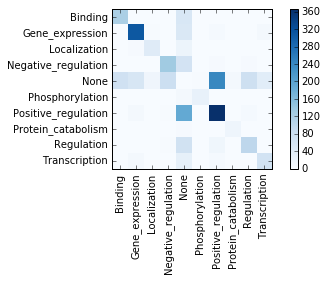

In [44]:
import statnlpbook.util as util
util.plot_confusion_matrix_dict(cm_dev,90, outside_label="None")

The confusion matrix can give you hints on what type of errors you should look for and improve upon. This macro view on your model's performance is often more powerful when combined with a micro view on the instances that produce these errors. You can find errors of a specific type using `bio.find_errors` as shown below:

In [45]:
errors = bio.find_errors("Transcription","None", event_dev, event_dev_guess)[:3]
errors

[(<statnlpbook.bio.EventCandidate at 0x7f51195ccb00>, 'Transcription', 'None'),
 (<statnlpbook.bio.EventCandidate at 0x7f5119590b00>, 'Transcription', 'None'),
 (<statnlpbook.bio.EventCandidate at 0x7f5119597278>, 'Transcription', 'None')]

These errors you can then inspect in detail via `show_event_error`:

In [46]:
bio.show_event_error(*errors[0])

Gold,Guess
Transcription,None


It can also be very useful to inspect your feature map for the given instance. Sometimes this leads you to find out that you have a bug in your feature calculation, or that the feature representation is still insufficient for other reasons.

In [47]:
event_feat(errors[0][0])

defaultdict(float,
            {'Child: auxpass->was': 1.0,
             'Child: nsubjpass->transcript': 1.0,
             'Child: prep_in->variety': 1.0,
             'Child_candidate: transcript': 1.0,
             'Child_candidate: variety': 0.0,
             'Child_candidate: was': 0.0,
             'Child_dependency_type: auxpass': 1.0,
             'Child_dependency_type: nsubjpass': 1.0,
             'Child_dependency_type: prep_in': 1.0,
             'Child_pos: NN': 2.0,
             'Child_pos: VBD': 1.0,
             'Child_pos_dependency: NN nsubjpass': 1.0,
             'Child_pos_dependency: NN prep_in': 1.0,
             'Child_pos_dependency: VBD auxpass': 1.0,
             'Child_protein: transcript': 0.0,
             'Child_protein: variety': 0.0,
             'Child_protein: was': 0.0,
             'Grand_child_candidate: /BCL6': 1.0,
             'Grand_child_candidate: LAZ3': 1.0,
             'Grand_child_candidate: The': 0.0,
             'Grand_child_candidate:

## <font color='red'>Assessment 2</font>: Assess Accuracy (50 pts) 

We assess how well your model performs on some unseen test set. We will look at the F1 across all event types, and will score them as follows:

* 0-40pts: 17% <= F1 < 60%, linear
* 40-50pts: 60% <= F1 < Best Result, linear

The **linear** mapping maps any F1 value between the lower and upper bound linearly to a score. For example, if your model's F1 score is $F=55$, then your score is $40\frac{F-17}{60-17}$. 

The *Best-Result* perplexity is the maximum of the best perplexity the course organiser achieved, and the submitted F1 scores.  

In [48]:
#! ASSESSMENT 2 - DO NOT CHANGE, MOVE NOR COPY
_snlp_event_test = event_dev # This line will be changed by us after submission to point to a test set.
_snlp_event_test_guess = predict_event_labels([x for x,_ in _snlp_event_test[:]])
_snlp_cm_test = bio.create_confusion_matrix(_snlp_event_test,_snlp_event_test_guess)  
bio.evaluate(_snlp_cm_test)[2] # This is the F1 score

0.6565265486725663

## <font color='orange'>Mark</font>:  Your solution to Task 2 is marked with ** __ points**. 
---

## <font color='blue'>Task 3</font>: Describe your Approach

When I started working on the features for the event trigger labeler, I decided to organise my code neatly by writing feature functions to be called in the main input-features mapping function <i>event_feat(event)</i>. In particular, each of these feature functions adds one or more same-theme features to a given input by creating the corresponding entries in the dictionary <i>result</i>. It's worth pointing out that I inserted a few one-line features directly into <i>event_feat(event)</i> in order to allow other functions to use them without having to recalculate them. <br>
When I started working on this assignment, I got inspired by the feature function developed for task 1 and started creating new features involving trigger word's dependencies, i.e. children, grandchildren, parents and grandparents. These features improved upon the F1 score performance of the single-feature trigger word mapping function originally provided. That said, I quickly started noticing that the trigger word's children features played a bigger role in my performance improvement than the trigger word's parents. This is also reflected in the fact that my final versions of the trigger word's children and parents feature functions, i.e. <i>add_dependency_child_feats2(result, event, trigger_word, index, trigger_pos)</i> and <i>add_dependency_parents_feats2(result, event, trigger_word, index, trigger_pos)</i>, have 15 and 6 features, respectively. Then, I started reading a few academic articles on feature-based biomedical event extraction and found a <b>very interesting paper</b> written by Lishuang Li, Yiwen Wang and Degen Huang, i.e. <b><i>Improving Feature-Based Biomedical Event Extraction System by Integrating Argument Information</i></b>. In fact, even though the features presented in the paper were designed to perform trigger detection, some of these features proved to be quite useful for the task in this assignment. Examples of these features are features 1 to 9 (see the code above). While simple features tended to improve the F1 score performance, the event's "bag of words" feature did not end up working very well. It's worth mentioning that I might have not implemented all of these features exactly as they were implented in the above-cited paper. Hence, I went on to implement other simple successful features such as checking whether the trigger word is a "stop word" or a "negative word" as well as unsuccessful features such as checking whether the trigger word is the first word of the event or a punctuation symbol. Features such as checking whether any of the possible trigger labels (except "None") or a "negative word", i.e. "negative", "no" or "not", appear in a given event helped me slightly improve the algorithm's performance. On the other hand, the F1 score received a great boost when I started considering features concerning proteins and candidate arguments (e.g. features 21 and 22). Moreover, I could further improve my performance by inserting new features related to proteins and candidate arguments in the trigger word's dependency feature functions. I found quite disappointing the fact that a neat feature such as the dependency distance from the trigger word to one of its top ancestors (see the <i>top_head_feature(result, event, index)</i> in the code above) did not really help improving my code's performance. At the very end of my feature engineering work, I optimized the logistic regression parameter <b>C</b> offline between 0 and 10 and found its optimal value to be approximately <b>2.3</b>. My final <b>F1 score</b> was <b>0.6565</b>. <br>
Even though my code performs quite well on most of the categories, some very troubling problems remain when it comes to the "None" and "Positive_regulation" categories. In fact, the algorithm makes a considerable number of classification errors in cases where the samples are classified as "None" but are something else and in cases where the samples are classified as something else but are actually labelled "None" (see confusion matrix above). One of the causes of this situation can probably be found in the fact that the <b>"None" events make up almost 90% of the event corpus</b> (64704 "None" events out of 71986), which greatly affects training and predictions. Moreover, when looking at the confusion matrix, it appears that my system cannot get any predictions correct when it comes to recognising actual "None" samples and predicting them as "None". The algorithm also struggles and makes several errors when it comes to discriminating the categories "None" and "Positive_regulation". I managed to improve my F1 score by a little bit after using the attribute <i>class_weight="balanced"</i> in the logistic regression in order to adjust the weights in an inversely proportional way with respect to the class frequencies (http://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). However, better results could probably be achieved if the algorithm was trained on a balanced dataset. Furthermore, in order to improve the F1 score, it would be very useful to come up with very good features that can discriminate "None" samples from everything else and "Positive_regulation" samples from "None" inputs. <br>
<b> The final version of my code includes 54 features (excluding the discarded features). All of these features are well commented and organised in my code (see above). </b> 




## <font color='red'>Assessment 3</font>: Assess Description (30 pts) 

We will mark the description along the following dimensions: 

* Clarity (10pts: very clear, 0pts: we can't figure out what you did)
* Creativity (10pts: we could not have come up with this, 0pts: Use only word based features of the trigger word)
* Substance (10pts: implemented complex state-of-the-art classifier, 0pts: Only use what is already there)

## <font color='orange'>Mark</font>:  Your solution to Task 3 is marked with ** __ points**.
---

## <font color='orange'>Final mark</font>: Your solution to Assignment 2 is marked with ** __points**. 